In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# plt styles
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (8, 5)

In [3]:
DATA_PATH = "../input/spaceship-titanic/"

In [4]:
df_train = pd.read_csv(DATA_PATH+"train.csv")
df_test = pd.read_csv(DATA_PATH+"test.csv")

In [5]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
df_train.shape, df_test.shape

((8693, 14), (4277, 13))

In [8]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
df_train['Transported'].value_counts(normalize=True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

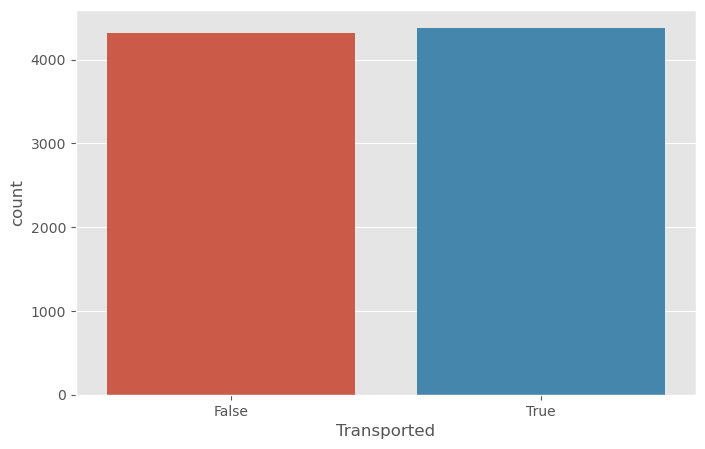

In [12]:
sns.countplot(data=df_train, x='Transported', orient='v');

> <div class="alert alert-block alert-info">
<b>Insight:</b> Data is Balanced.</div>

In [13]:
df_train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [14]:
df_train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [15]:
df_test['HomePlanet'].value_counts()

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

In [16]:
df_test['Destination'].value_counts()

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

### Relation of Label with Features

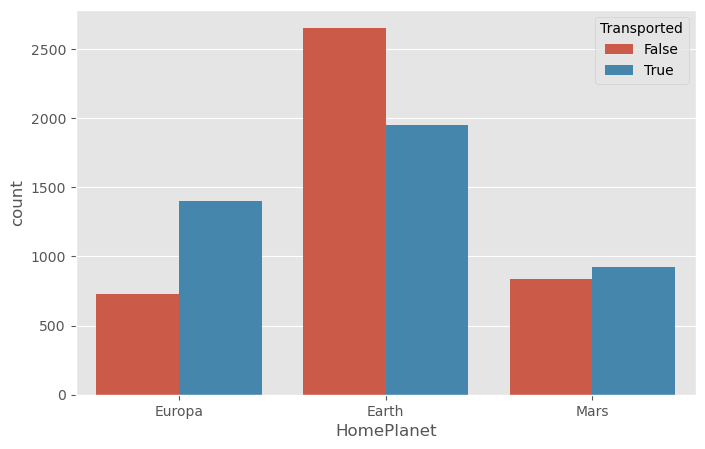

In [17]:
sns.countplot(data=df_train, x='HomePlanet', hue='Transported');

> <div class="alert alert-block alert-info">
<b>Insight:</b> More people transported to the alternate dimension are from Europa or Mars compared to Earth.</div>

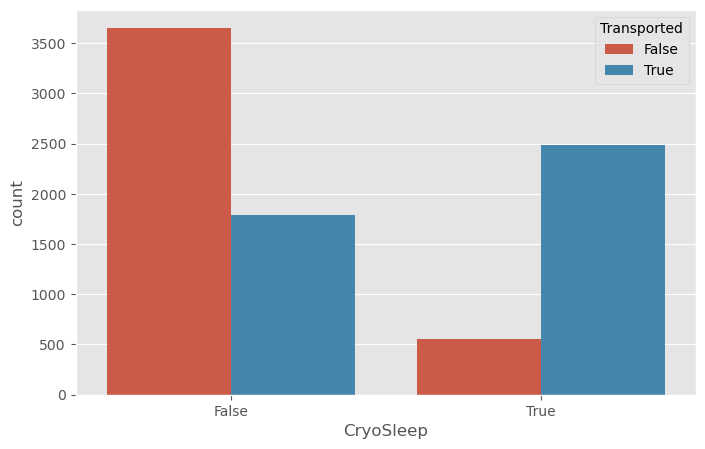

In [18]:
sns.countplot(data=df_train, x='CryoSleep', hue='Transported');

> <div class="alert alert-block alert-info">
<b>Insight:</b> We can see, most of them who were on Cryosleep transported compared to passengers who were not on Cryosleep.</div>

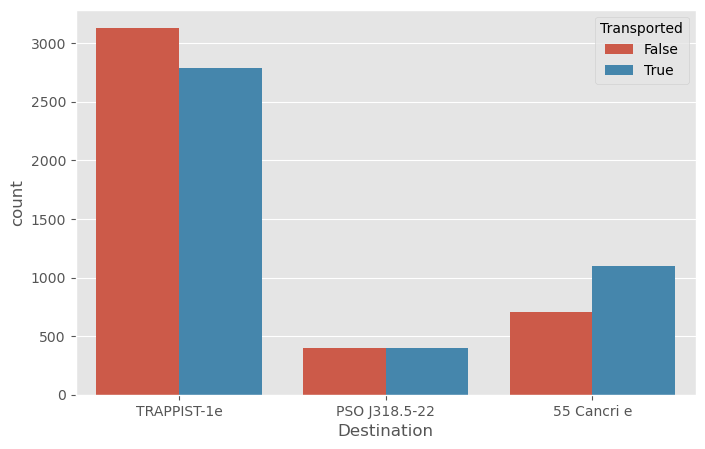

In [19]:
sns.countplot(data=df_train, x='Destination', hue='Transported');

> <div class="alert alert-block alert-info">
<b>Insight:</b> Seems, destination has nothing much to do with it. </div>

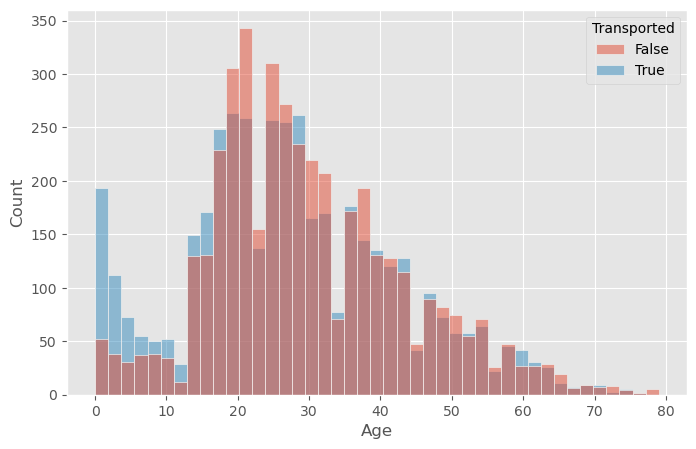

In [20]:
sns.histplot(data=df_train, x='Age', hue='Transported', fill=True);

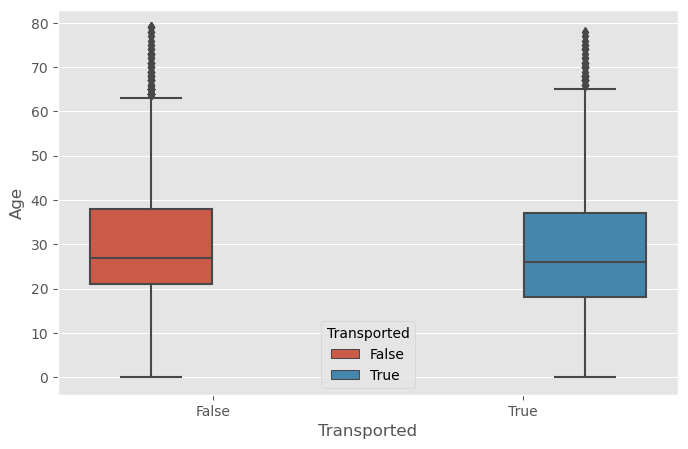

In [21]:
sns.boxplot(data=df_train, x='Transported', y='Age', hue='Transported');

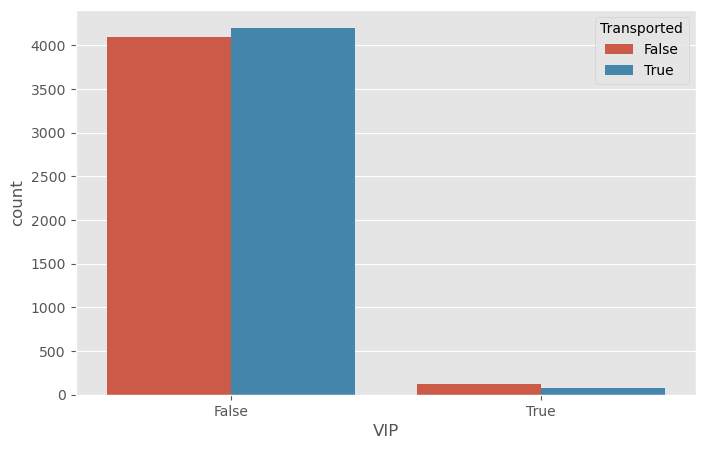

In [22]:
sns.countplot(data=df_train, x='VIP', hue='Transported');

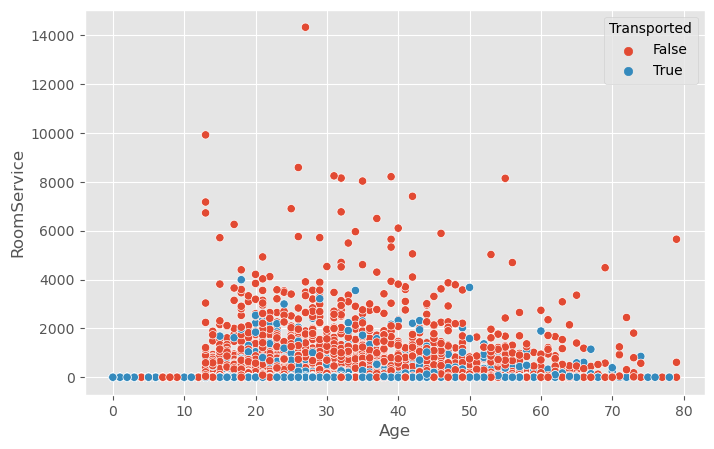

In [23]:
sns.scatterplot(data=df_train, x='Age', y='RoomService', hue='Transported');

> <div class="alert alert-block alert-info">
<b>Insight:</b> Surprisingly, no one spending above 4000 got transported.</div>

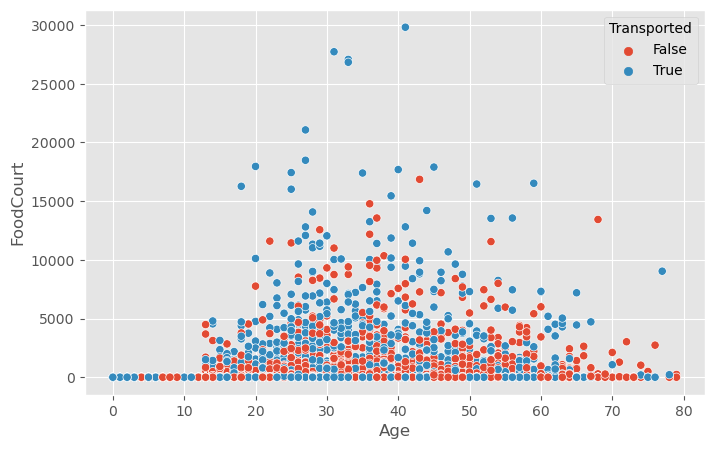

In [24]:
sns.scatterplot(data=df_train, x='Age', y='FoodCourt', hue='Transported');

> <div class="alert alert-block alert-info">
<b>Insight:</b> Here we see the opposite trend, people with more spend on Foodcourt got transported.</div>

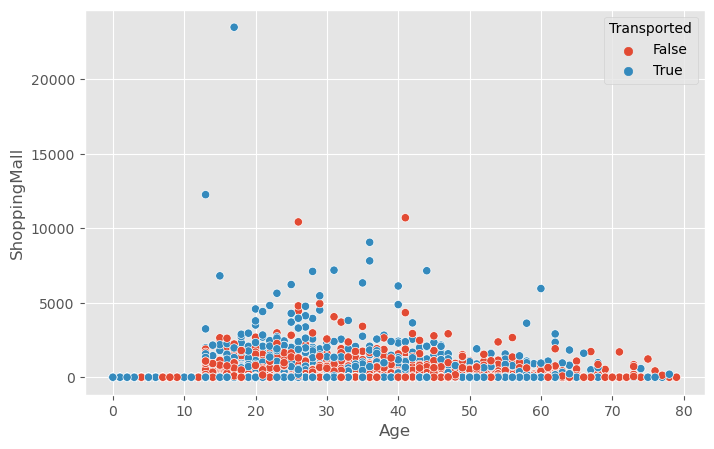

In [25]:
sns.scatterplot(data=df_train, x='Age', y='ShoppingMall', hue='Transported');

> <div class="alert alert-block alert-info">
<b>Insight:</b> Looks okay, seems this has no effect.</div>

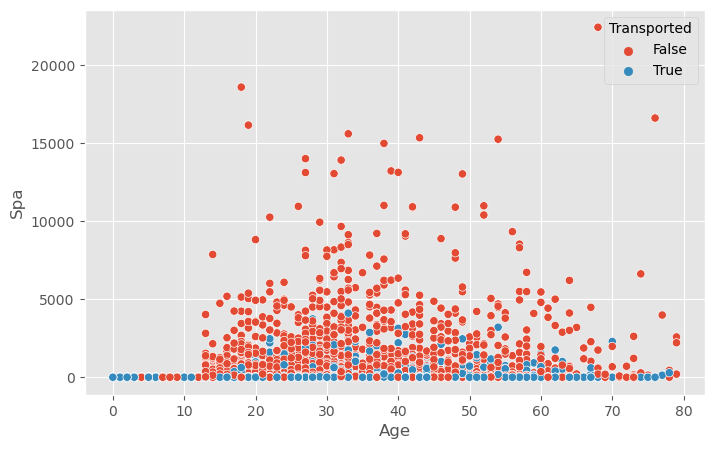

In [26]:
sns.scatterplot(data=df_train, x='Age', y='Spa', hue='Transported');

> <div class="alert alert-block alert-info">
<b>Insight:</b> Most of them who spent more on Spa didn't get transported. Hmm...?</div>

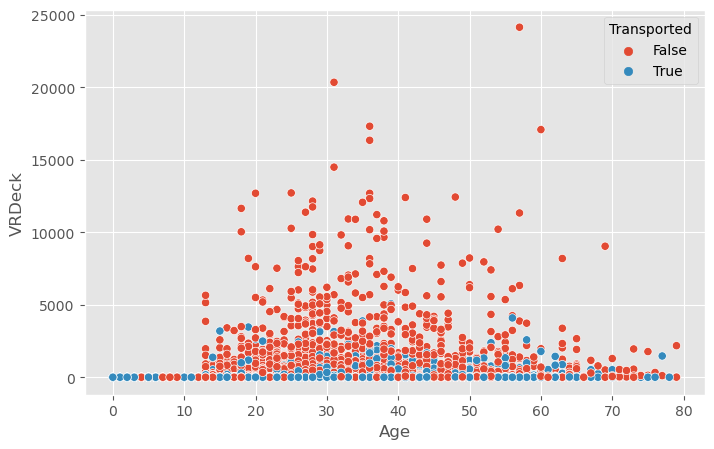

In [27]:
sns.scatterplot(data=df_train, x='Age', y='VRDeck', hue='Transported');

> <div class="alert alert-block alert-info">
<b>Insight:</b> Again, Most of them who spent more on VR Deck didn't get transported.</div>

#### Feature Engineering

In [28]:
df_train[['CabinDeck', 'CabinNum', 'CabinSide']] = df_train.Cabin.str.split("/", expand=True)
df_test[['CabinDeck', 'CabinNum', 'CabinSide']] = df_test.Cabin.str.split("/", expand=True)

In [29]:
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

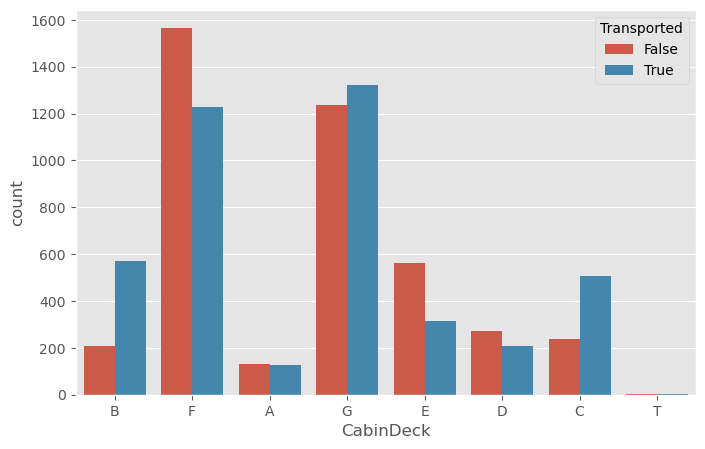

In [30]:
sns.countplot(data=df_train, x='CabinDeck', hue='Transported');

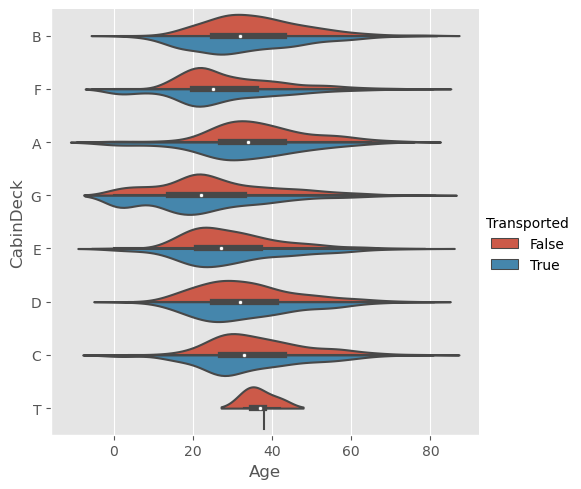

In [31]:
sns.catplot(data=df_train, x='Age', y='CabinDeck', hue='Transported', kind='violin', split=True);

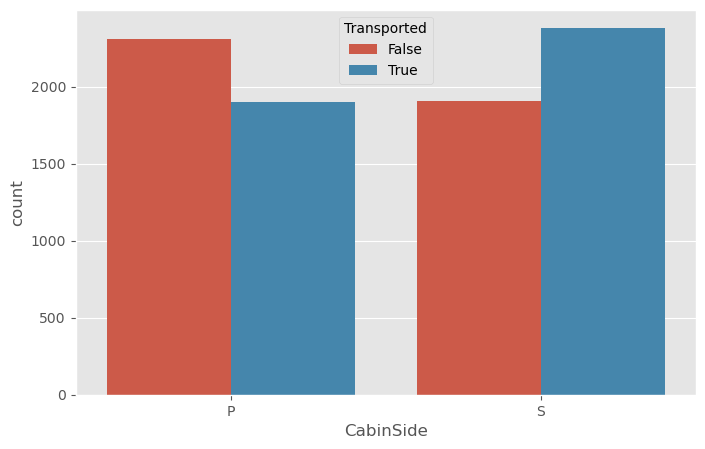

In [32]:
sns.countplot(data=df_train, x='CabinSide', hue='Transported');

### Feature Engineering

#### Combining DataFrames

In [33]:
df_train.isnull().sum()+df_test.isnull().sum()

Age             270.0
CabinDeck       299.0
CabinNum        299.0
CabinSide       299.0
CryoSleep       310.0
Destination     274.0
FoodCourt       289.0
HomePlanet      288.0
Name            294.0
PassengerId       0.0
RoomService     263.0
ShoppingMall    306.0
Spa             284.0
Transported       NaN
VIP             296.0
VRDeck          268.0
dtype: float64

In [34]:
df_train.tail()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S
8692,9280_02,Europa,False,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True,E,608,S


In [35]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNum,CabinSide
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


#### Creating a New Feature 'Expenses'

In [36]:
df=df_train.append(df_test)

In [37]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [38]:
ex = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df['Expenses'] = df[ex].sum(axis=1)

#### Let's see how 'Expenses' are varied by CryoSleep

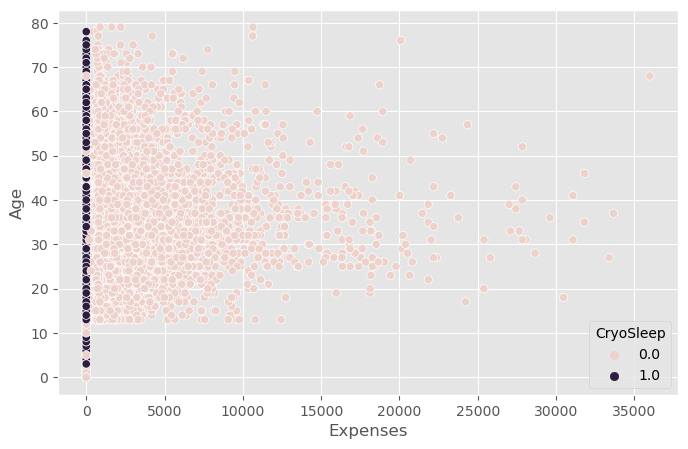

In [39]:
sns.scatterplot(data=df, x='Expenses', y='Age', hue='CryoSleep');

> <div class="alert alert-block alert-info">
<b>Insight:</b> This proves if a passenger opted for CryoSleep, they won't spend anything on amenities. Because they can't.</div>

In [40]:
df['CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [41]:
df['CryoSleep'].isnull().sum()

310

In [42]:
df.loc[:,['CryoSleep']]=df.apply(lambda x: True if x.Expenses == 0 and pd.isnull(x.CryoSleep) else x,axis=1)

In [43]:
df['CryoSleep'].isnull().sum()

174

In [44]:
df[ex].isnull().sum()

RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
dtype: int64

#### Applying this property to fill null values for expense columns

In [45]:
df.loc[:,ex]=df.apply(lambda x: 0 if x.CryoSleep == True else x, axis=1)

In [46]:
df[ex].isnull().sum()

RoomService     170
FoodCourt       179
ShoppingMall    172
Spa             173
VRDeck          172
dtype: int64

In [47]:
df.shape

(12970, 17)

### Work on Passenger IDs and Names

In [48]:
df[['PassengerIdGroup', 'PassengerIdNum']] = df.PassengerId.str.split("_", expand=True)
df[['NameFirst', 'NameFamily']] = df.Name.str.split(" ", expand=True)

> <div class="alert alert-block alert-info">
<b>Insight:</b> It is extremely likely that if a two passengers are from the same group, they share the same HomePlanet and Destination.</div>

In [49]:
df.isnull().sum()

PassengerId            0
HomePlanet           288
CryoSleep            174
Destination          274
Age                  270
VIP                  296
RoomService          170
FoodCourt            179
ShoppingMall         172
Spa                  173
VRDeck               172
Name                 294
Transported         4277
CabinDeck            299
CabinNum             299
CabinSide            299
Expenses               0
PassengerIdGroup       0
PassengerIdNum         0
NameFirst            294
NameFamily           294
dtype: int64

In [50]:
dict_lookup1 = dict(zip(df['PassengerIdGroup'], df['HomePlanet']))

In [51]:
df.HomePlanet = df.HomePlanet.fillna(df.PassengerIdGroup.map(dict_lookup1))

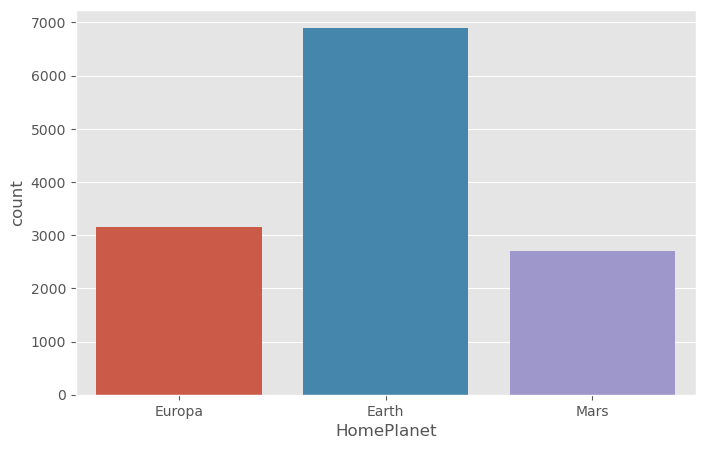

In [52]:
sns.countplot(data=df, x='HomePlanet');

In [53]:
dict_lookup2 = dict(zip(df['PassengerIdGroup'], df['Destination']))

In [54]:
df.Destination = df.Destination.fillna(df.PassengerIdGroup.map(dict_lookup2))

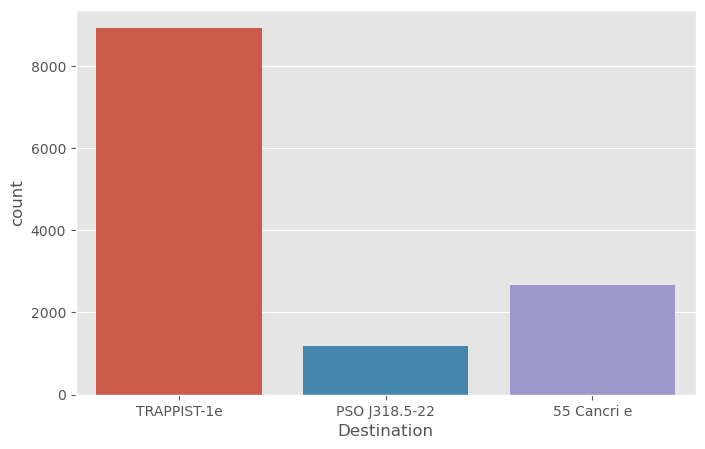

In [55]:
sns.countplot(data=df, x='Destination');

> <div class="alert alert-block alert-info">
<b>Insight:</b> Also, we can assume that the family name is related to the HomePlanet and Destination feature. Atleast that's the best we got.</div>

In [56]:
dict_lookup3 = dict(zip(df['NameFamily'], df['HomePlanet']))

In [57]:
df.HomePlanet = df.HomePlanet.fillna(df.NameFamily.map(dict_lookup3))

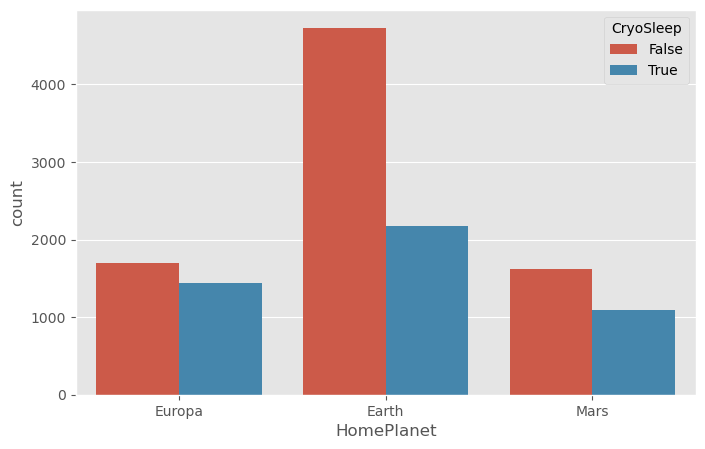

In [58]:
sns.countplot(data=df, x='HomePlanet', hue='CryoSleep');

> <div class="alert alert-block alert-info">
<b>Insight:</b> If HomePlanet is 'Europa' or 'Mars', they're more likely to be in cryosleep. </div>

In [59]:
dict_lookup4 = dict(zip(df['NameFamily'], df['Destination']))

In [60]:
df.Destination = df.Destination.fillna(df.NameFamily.map(dict_lookup4))

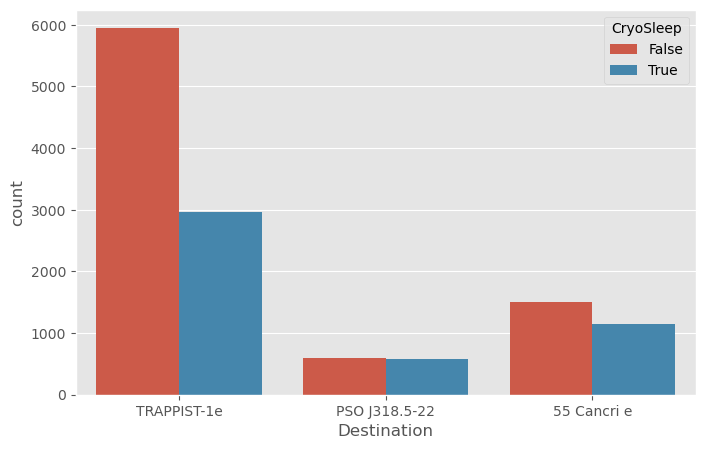

In [61]:
sns.countplot(data=df, x='Destination', hue='CryoSleep');

> <div class="alert alert-block alert-info">
<b>Insight:</b> If Destination is PSO J318.5-22, they're more likely to be in cryosleep. </div>

In [62]:
df.isnull().sum()

PassengerId            0
HomePlanet            49
CryoSleep            174
Destination           54
Age                  270
VIP                  296
RoomService          170
FoodCourt            179
ShoppingMall         172
Spa                  173
VRDeck               172
Name                 294
Transported         4277
CabinDeck            299
CabinNum             299
CabinSide            299
Expenses               0
PassengerIdGroup       0
PassengerIdNum         0
NameFirst            294
NameFamily           294
dtype: int64

In [63]:
print(df[['PassengerIdGroup', 'CryoSleep', 'NameFamily']].head(15).to_markdown())

|    |   PassengerIdGroup | CryoSleep   | NameFamily   |
|---:|-------------------:|:------------|:-------------|
|  0 |               0001 | False       | Ofracculy    |
|  1 |               0002 | False       | Vines        |
|  2 |               0003 | False       | Susent       |
|  3 |               0003 | False       | Susent       |
|  4 |               0004 | False       | Santantines  |
|  5 |               0005 | False       | Hinetthews   |
|  6 |               0006 | False       | Jacostaffey  |
|  7 |               0006 | True        | Jacostaffey  |
|  8 |               0007 | False       | Beston       |
|  9 |               0008 | True        | Flatic       |
| 10 |               0008 | True        | Flatic       |
| 11 |               0008 | False       | Flatic       |
| 12 |               0009 | False       | Barne        |
| 13 |               0010 | False       | Baketton     |
| 14 |               0011 | False       | Bertsontry   |


> <div class="alert alert-block alert-info">
<b>Insight:</b> It is really hard to estimate if a person was in CryoSleep or not based on their Group or Family Name. The results are mostly mixed.</div>

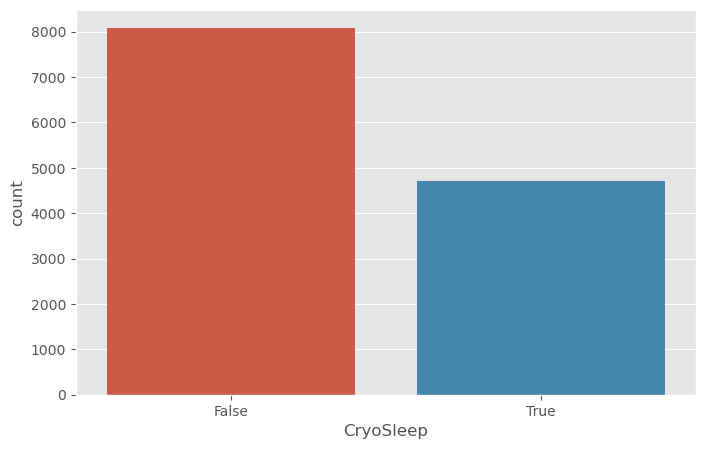

In [64]:
sns.countplot(data=df, x='CryoSleep');

> <div class="alert alert-block alert-info">
<b>Insight:</b> If in case, gone for majority voting, that'd make this feature more imbalanced. </div>

In [65]:
df['CryoSleep'].isnull().sum()

174

In [66]:
df.loc[:,['CryoSleep']]=df.apply(lambda x: True if x.HomePlanet == 'Europa' and pd.isnull(x.CryoSleep) and x.Expenses == 0 else x,axis=1)

In [67]:
df.loc[:,['CryoSleep']]=df.apply(lambda x: True if x.Destination == 'PSO J318.5-22' and pd.isnull(x.CryoSleep) and x.Expenses == 0 else x,axis=1)

> <div class="alert alert-block alert-info">
<b>Insight:</b> It is really hard to estimate if a person was in CryoSleep or not based on their Group or Family Name. The results are mostly mixed.</div>

Imputing Expenses once more.

In [68]:
df.loc[:,ex]=df.apply(lambda x: 0 if x.CryoSleep == True else x, axis=1)

#### Imputing VIP

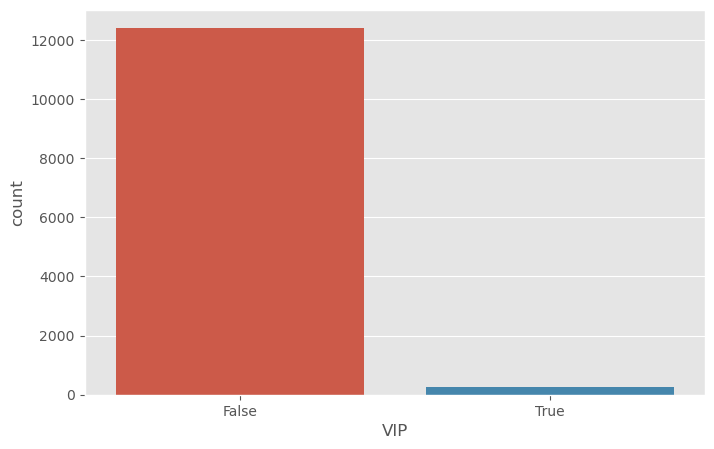

In [69]:
sns.countplot(data=df, x='VIP');

In [70]:
pd.crosstab(df.CabinDeck, df.VIP)

VIP,False,True
CabinDeck,,
A,299,45
B,1058,58
C,1018,55
D,666,41
E,1274,26
F,4102,41
G,3693,0
T,10,0


In [71]:
pd.crosstab(df.CabinSide, df.VIP)

VIP,False,True
CabinSide,,
P,6005,142
S,6115,124


In [72]:
pd.crosstab(df.VIP, df.CryoSleep)

CryoSleep,False,True
VIP,,
False,7657,4580
True,239,28


In [73]:
pd.crosstab(df.VIP, df.Destination)

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
VIP,,,
False,2530,1153,8666
True,86,22,164


In [74]:
pd.crosstab(df.VIP, df.HomePlanet)

HomePlanet,Earth,Europa,Mars
VIP,,,
False,6839,2930,2585
True,0,179,93


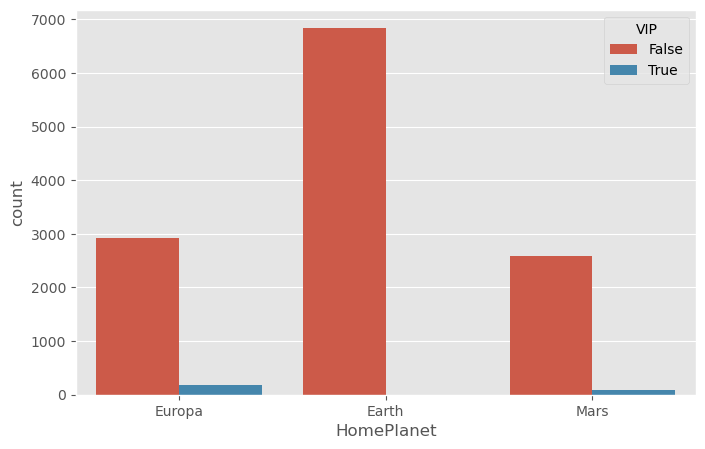

In [75]:
sns.countplot(data=df, x='HomePlanet', hue='VIP');

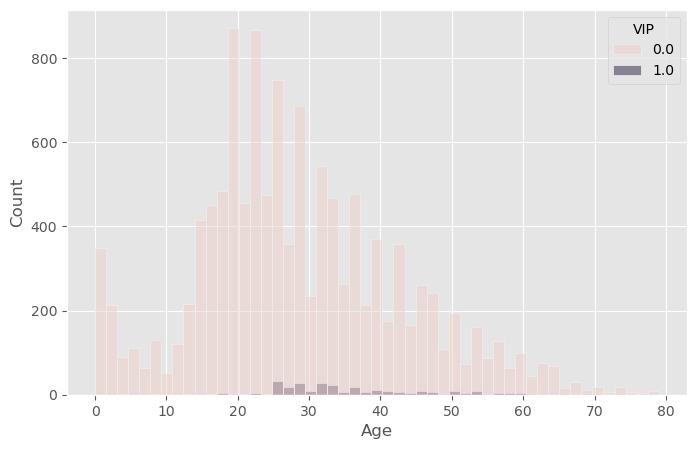

In [76]:
sns.histplot(data=df, x='Age', hue='VIP');

In [77]:
df.loc[[df.loc[df.VIP == True, 'Age'].idxmin()]]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Name,Transported,CabinDeck,CabinNum,CabinSide,Expenses,PassengerIdGroup,PassengerIdNum,NameFirst,NameFamily
3283,3527_01,Mars,False,TRAPPIST-1e,18.0,True,733.0,0.0,688.0,1.0,...,Cindee Terte,False,F,729,P,1422.0,3527,01,Cindee,Terte


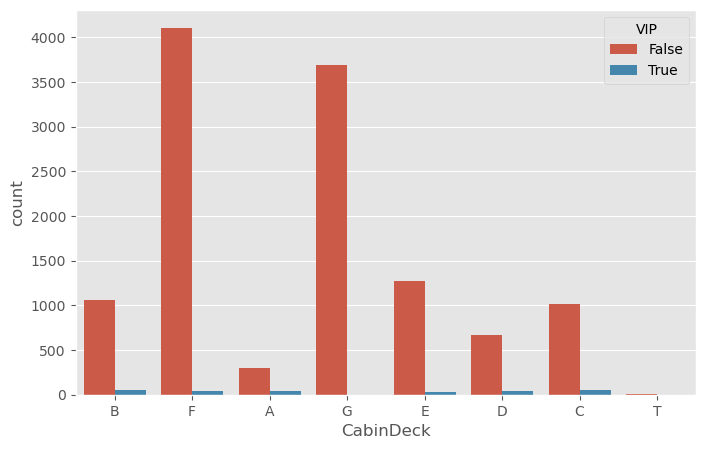

In [78]:
sns.countplot(data=df, x='CabinDeck', hue='VIP');

In [79]:
df['VIP'].isnull().sum()

296

In [80]:
df.loc[:,['VIP']]=df.apply(lambda x: False if x.CabinDeck == 'G' and pd.isnull(x.VIP) else x, axis=1)

In [81]:
df.loc[:,['VIP']]=df.apply(lambda x: False if x.CabinDeck == 'T' and pd.isnull(x.VIP) else x, axis=1)

In [82]:
df.loc[:,['VIP']]=df.apply(lambda x: False if x.HomePlanet == 'Earth' and pd.isnull(x.VIP) else x, axis=1)

In [83]:
df['VIP'].isnull().sum()

134

### Removal of unnecessary series from dataframe

In [84]:
drop_cols = ['Name', 'PassengerIdNum', 'NameFirst', 'NameFamily', 'Expenses']
df.drop(drop_cols, axis=1, inplace=True)

In [85]:
age_ex_corr = df.select_dtypes(include='number').corr()
triu = np.triu(age_ex_corr)
np.fill_diagonal(triu, False)

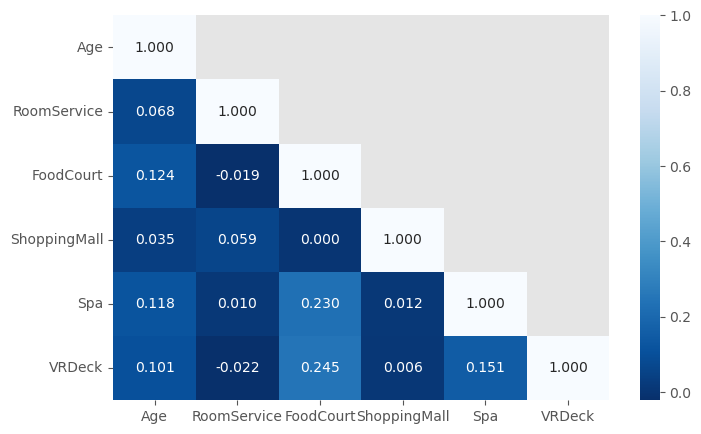

In [86]:
ax=plt.subplot()
sns.heatmap(age_ex_corr, annot=True, fmt='0.3f', ax=ax, cmap = 'Blues_r', mask=triu);

In [87]:
df.isnull().mean() * 100

PassengerId          0.000000
HomePlanet           0.377795
CryoSleep            1.341557
Destination          0.416345
Age                  2.081727
VIP                  1.033153
RoomService          1.310717
FoodCourt            1.380108
ShoppingMall         1.326137
Spa                  1.333847
VRDeck               1.326137
Transported         32.976099
CabinDeck            2.305320
CabinNum             2.305320
CabinSide            2.305320
PassengerIdGroup     0.000000
dtype: float64

In [88]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'CabinDeck', 'CabinNum', 'CabinSide',
       'PassengerIdGroup'],
      dtype='object')

In [89]:
df.isnull().sum()

PassengerId            0
HomePlanet            49
CryoSleep            174
Destination           54
Age                  270
VIP                  134
RoomService          170
FoodCourt            179
ShoppingMall         172
Spa                  173
VRDeck               172
Transported         4277
CabinDeck            299
CabinNum             299
CabinSide            299
PassengerIdGroup       0
dtype: int64

Label Encoding

In [90]:
submission_cols = ['PassengerId', 'Transported']
subbak = df[submission_cols]
df.drop(submission_cols, axis=1, inplace=True)

In [91]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide,PassengerIdGroup
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P,0001
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S,0002
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S,0003
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S,0003
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,1496,S,9266
12966,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,NaN,NaN,9269
12967,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,D,296,P,9271
12968,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,D,297,P,9273


In [92]:
df.Age = df.Age.replace({0:np.nan})

In [93]:
# df.CabinNum = df.CabinNum.astype('Int64')

In [94]:
# df.PassengerIdGroup = df.CabinNum.astype('Int64')

In [95]:
# df.Expenses = df.CabinNum.astype('Float64')

In [96]:
df.CryoSleep = df.CryoSleep.replace({True: 1, False: 0})

In [97]:
df.VIP = df.VIP.replace({True: 1, False: 0})

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HomePlanet        12921 non-null  object 
 1   CryoSleep         12796 non-null  float64
 2   Destination       12916 non-null  object 
 3   Age               12440 non-null  float64
 4   VIP               12836 non-null  float64
 5   RoomService       12800 non-null  float64
 6   FoodCourt         12791 non-null  float64
 7   ShoppingMall      12798 non-null  float64
 8   Spa               12797 non-null  float64
 9   VRDeck            12798 non-null  float64
 10  CabinDeck         12671 non-null  object 
 11  CabinNum          12671 non-null  object 
 12  CabinSide         12671 non-null  object 
 13  PassengerIdGroup  12970 non-null  object 
dtypes: float64(8), object(6)
memory usage: 1.4+ MB


In [99]:
df1 = pd.get_dummies(df)

In [100]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Columns: 11198 entries, CryoSleep to PassengerIdGroup_9280
dtypes: float64(8), uint8(11190)
memory usage: 139.2 MB


In [101]:
df1.loc[df.HomePlanet.isnull(), df1.columns.str.startswith("HomePlanet_")] = np.nan

In [102]:
df1.loc[df.Destination.isnull(), df1.columns.str.startswith("Destination_")] = np.nan

In [103]:
df1.loc[df.CabinDeck.isnull(), df1.columns.str.startswith("CabinDeck_")] = np.nan

In [104]:
df1.loc[df.CabinSide.isnull(), df1.columns.str.startswith("CabinSide_")] = np.nan

In [105]:
# df.HomePlanet = df.HomePlanet.replace({'Europa':0, 'Earth':1, 'Mars':2})
# df.Destination = df.Destination.replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})
# df.CabinDeck = df.CabinDeck.replace({'B':2, 'F':6, 'A':1, 'G':7, 'E':5, 'D':4, 'C':3, 'T':8})
# df.CabinSide = df.CabinSide.replace({'P':0, 'S':1})

In [106]:
df1.isnull().sum()

CryoSleep                174
Age                      530
VIP                      134
RoomService              170
FoodCourt                179
                        ... 
PassengerIdGroup_9276      0
PassengerIdGroup_9277      0
PassengerIdGroup_9278      0
PassengerIdGroup_9279      0
PassengerIdGroup_9280      0
Length: 11198, dtype: int64

### Imputing missing values

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)
df1.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,PassengerIdGroup_9271,PassengerIdGroup_9272,PassengerIdGroup_9273,PassengerIdGroup_9274,PassengerIdGroup_9275,PassengerIdGroup_9276,PassengerIdGroup_9277,PassengerIdGroup_9278,PassengerIdGroup_9279,PassengerIdGroup_9280
0,0.0,0.487179,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.294872,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.730769,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.410256,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.192308,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df1 = pd.DataFrame(imputer.fit_transform(df1),columns = df1.columns)

In [109]:
df_final = pd.concat([df1, subbak], axis=1)

#### Train Test Split

In [110]:
PassengerId = df_final['PassengerId']
df_final = df_final.drop('PassengerId', axis=1)

In [111]:
train_valid = df_final[df_final['Transported'].notnull()].copy()
train_valid.Transported =train_valid.Transported.astype('int')
test = df_final[df_final['Transported'].isnull()].drop('Transported', axis=1)

In [112]:
train_valid.shape

(8693, 11199)

In [113]:
test.shape

(4277, 11198)

### Model Training

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
target_names = train_valid['Transported'].unique()

In [116]:
train_valid['Transported'].unique()

array([0, 1])

In [117]:
# handling outliers
# def remove_outliers(df,columns,n_std):
#     for col in columns:
#         print('Currently removing: {}'.format(col))
#         mean = df[col].mean()
#         sd = df[col].std()
#         df = df[(df[col] <= mean+(n_std*sd))]
        
#     return df

In [118]:
# columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# n_std = 5 # Three standard deviations away from the mean to differentiate outlier from non-outlier.

In [119]:
# train_valid = remove_outliers(train_validx,columns,n_std)

In [120]:
X, y = train_valid.drop(columns = ['Transported'], axis=1).copy(), train_valid['Transported']

In [121]:
train_size = 0.8

In [122]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=train_size, random_state=17)

In [123]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)

(6954, 11198)
(6954,)
(1739, 11198)
(1739,)


(None, None)

### Cross Validation and Model Selection

Using 3 best fit classifier models according to the case here to check the initial accuracy on training data.
- DecisionTree
- RandomForest
- LGBM

In [124]:
#Splitting the data into a train and validation set
#Model Score using KFold
#The folds are made by preserving the percentages of samples for each class

from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

count = 1
#we use split method that will generate indices to split data into train and test sets

for train_index, test_index in skf.split(X_train, y_train):
    print(f'Fold:{count}, Train set: {len(train_index)},Test set:{len(test_index)}')
    count+=1

Fold:1, Train set: 5563,Test set:1391
Fold:2, Train set: 5563,Test set:1391
Fold:3, Train set: 5563,Test set:1391
Fold:4, Train set: 5563,Test set:1391
Fold:5, Train set: 5564,Test set:1390


In [125]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [126]:
# from lazypredict.Supervised import LazyClassifier

In [127]:
# clf = LazyClassifier(verbose=0)

In [128]:
# models, predictions = clf.fit(X_train, X_valid, y_train, y_valid)

In [129]:
# models

#### Random Forest

In [130]:
score = cross_val_score(RandomForestClassifier(random_state=17), 
                        X_train, y_train, cv=skf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.7821711  0.78720345 0.7922358  0.78432782 0.78201439]
Average score: 0.79


#### LGBM Classifier

In [131]:
score = cross_val_score(LGBMClassifier(random_state=17), 
                        X_train, y_train, cv=skf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.78864127 0.78504673 0.8015816  0.80086269 0.79856115]
Average score: 0.79


#### Logistic Regression

In [132]:
score = cross_val_score(LogisticRegression(random_state=17), 
                        X_train, y_train, cv=skf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Scores for each fold are: [0.75557153 0.74119339 0.76419842 0.75413372 0.76690647]
Average score: 0.76


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Light GBM approach

In [133]:
lgbc = LGBMClassifier()

In [134]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [135]:
lgb_parms = {'learning_rate': [0.02, 0.03, 0.05, 0.1, 0.3, 0.5],\
            'n_estimators': [200, 400, 800],\
            'boosting_type' : ['gbdt', 'dart'],\
            'objective' : ['binary'],\
            'random_state' : [17]}

In [136]:
grid_lgb = GridSearchCV(lgbc, lgb_parms, verbose=1, cv=skf, n_jobs=-1)

In [137]:
grid_lgb.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.02, 0.03, 0.05, 0.1, 0.3, 0.5],
                         'n_estimators': [200, 400, 800],
                         'objective': ['binary'], 'random_state': [17]},
             verbose=1)

In [138]:
print(grid_lgb.best_params_)

{'boosting_type': 'gbdt', 'learning_rate': 0.02, 'n_estimators': 200, 'objective': 'binary', 'random_state': 17}


In [139]:
predictions_lgb = grid_lgb.predict(X_valid)

In [140]:
## Classification report for LGBM classifier

from sklearn.metrics import classification_report
print(classification_report(y_valid, predictions_lgb))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       857
           1       0.80      0.83      0.82       882

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [142]:
plt.rcParams["figure.figsize"] = (6, 4)

In [143]:
ack = accuracy_score(y_valid, predictions_lgb, normalize=True)
print(ack)

0.8113858539390454


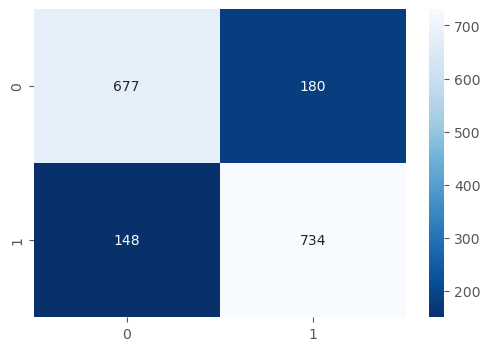

In [144]:
cf_mat_lgb = confusion_matrix(y_valid, predictions_lgb)

ax= plt.subplot()
sns.heatmap(cf_mat_lgb, annot=True, fmt='g', ax=ax, robust=True, cmap = 'Blues_r');

In [145]:
orig_submission_passid = subbak[subbak['Transported'].isnull()].drop('Transported', axis=1)

In [146]:
orig_submission_passid.reset_index(inplace=True)

In [147]:
Transported = pd.DataFrame(grid_lgb.predict(test), columns = ['Transported']).astype(bool)

In [148]:
submission = pd.concat([orig_submission_passid, Transported], axis=1)

In [149]:
submission.drop(['index'], axis=1, inplace=True)

In [150]:
submission.to_csv('submission.csv', index=False)